## 결측치와 누락값 & 이상치

데이터분석기초_3회차

### 데이터 분석에서 결측치와 누락값은 정말 중요한 포인트
- 결측치 : 실제 Na 값이지만, 정말 Na 값 일수도 있다
- 누락값 : 휴먼에러로 인한 Na

#### 결측치를 왜 처리하려고 하는가
- 결측치를 머신에게 학습시키기 위해서
- 실제 Na > 인사이트 제공

#### Na 값이 왜 중요한가?
- x 값이 누락값이 실제의 값과 유사하게 대입되면 실제값과 예측값이 같아지는 것
- 결측치가 실제값과 유사하게 되지 않는다면 > 결국 차이 발생, 모델의 성능에도 영향을 미침

#### 결측치 처리 방법
- 1. 전부 결측치를 날린다
    - 결측치를 날리는 기준? 전제 비중에 1% 미만 정도면 쉽게 날린다. 하지만 절대값에 따라 달라질 수 있다.

- 2. 결측치가 상당한 비중을 차지하는 경우, 30~40% 
    - 다 날리는 경우 > 머신에게 학습시킬 데이터 양이 줄어드는 것
    - 성능에 영향을 미칠 수 있다.
    - 결측치를 회대한 채워서 매꾸는 형식을 생각해야 한다.
    
- 3. 너무 데이터가 다 결측치라면, 날려도 상관없다. 80~90%가 결측치인 컬럼이면 비즈니스적인 이해관계를 보고 도메인 지식을 이용해서 날려야 한다.
    - 결측치를 채울 수 없다면
    
---
- 결측치가 이렇게 많은 컬럼에서 단순하게 접근해서 결측치를 대체한다면, 평균으로만 대체한다면 ---> 예) 기온데이터라고 한다면 날씨는 계절에 의해 영향을 받는데 문제가 커질 수 있다.

- 결측치는 단순하게 생각할 것이 절대 아니다. 도메인 지식으로 고민하고, 통계적으로도 고민해야 한다.

#### 결측치 용어
- 완전 무작위 결측치 MCAR(Missing Completely at Random) : 완전무작위 > 어떤 인간의 편향이나 기계 결함이 아니라 완전 무작위 랜덤한 것
- 무작위 결측 MAR(Missing at Random) : 어떤 상황으로 인해서 발생하는 경우, 기업에서 제조과정에서 A 제조공정과 B 제조공정에만 문제가 발생한 결측치
- 비무작위 결측 NMAR(Missing at not Random) : 결측값인데 na가 하나의 특성이 될 수 있다. 서베이 > 소득에 대한 서베이라면 자신의 소득을 알려주기 꺼려할 수도 있다.



### 결측치 처리 방법
- 결측치 날리고 진행
- 평균, 중위값 등등 통계 값으로 대체
- 보간법(interpolation) > 이 부분 집중해서 공부할 것
- 선형보간, Spline 보간, time 시계열 보간법 등등

### Step 01. 데이터 불러오기 & 라이브러리 임포트

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [12]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Python Data Analytics/data/bike_sharing_daily.csv')
dfd = pd.read_csv('Python Data Analytics/data/country_timeseries.csv')

In [10]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

<Axes: >

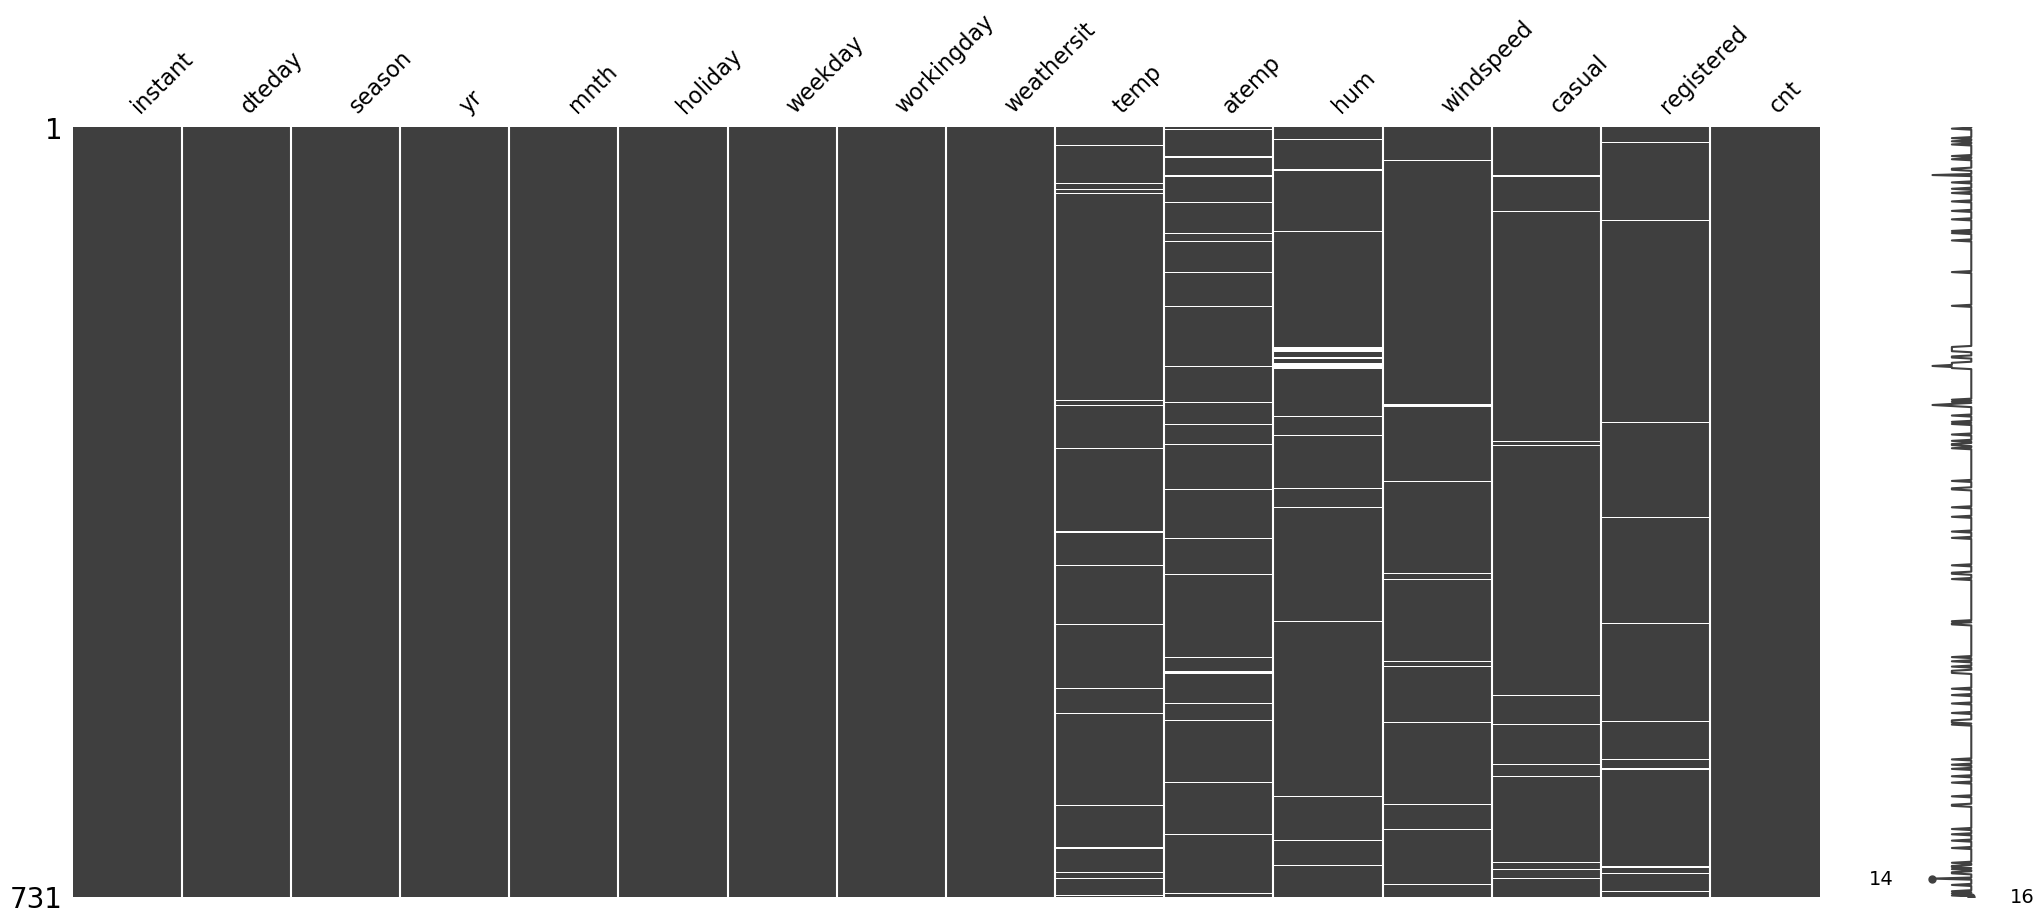

In [11]:
msno.matrix(df)

- fillna(method = '')

### Step 1. 결측치 처리 방법 1

### Step 2. 결측치 처리 방법 2 보간법(interpolate)
- 중간에 결측값이 있을 경우, 누락값 사이의 값을 평균으로 처리하는 방법
- interpolate(method = '')


매끄럽게 선형으로 하기 위해서 1차, 2차, 3차 등으로 늘려가며 보간을 한다.